In [1]:
from flyanalysis.braidz import read_braidz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [19]:
def read_files(files):
    data = {}

    for file in tqdm(files):
        df, csvs = read_braidz("/home/buchsbaum/mnt/md0/Experiments/" + file)
        data[file] = {}
        data[file]["df"] = df
        data[file]["stim"] = csvs["stim"]

    return data

def get_angular_velocity(data):
    angular_velocities = []
    
    for file, data in data.items():
        df = data["df"]
        stim = data["stim"]

        for idx, row in stim.iterrows():
            obj_id = int(row["obj_id"])
            frame = int(row["frame"])

            grp = df[df["obj_id"] == obj_id]

            stim_idx = np.where(grp["frame"] == frame)[0][0]

            start_idx = stim_idx - 50
            end_idx = stim_idx + 100

            if start_idx < 0 or end_idx >= len(grp):
                continue

            theta = np.arctan2(grp.y.values, grp.x.values)
            theta_unwrap = np.unwrap(theta, period=2*np.pi)
            angular_velocity = np.gradient(theta_unwrap,0.01)

            angular_velocities.append(angular_velocity[start_idx:end_idx])

    return angular_velocities

In [20]:
j53_files = ["20240610_110919.braidz", "20240618_104047.braidz", "20240618_134153.braidz"]
j53_data = read_files(j53_files)
j53_angular_velocities = get_angular_velocity(j53_data)

empty_files = ["20240815_135833.braidz"]
empty_data = read_files(empty_files)
empty_angular_velocities = get_angular_velocity(empty_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Reading /home/buchsbaum/mnt/md0/Experiments/20240610_110919.braidz using pyarrow


 33%|███▎      | 1/3 [00:06<00:13,  6.56s/it]

Reading /home/buchsbaum/mnt/md0/Experiments/20240618_104047.braidz using pyarrow


 67%|██████▋   | 2/3 [00:07<00:03,  3.06s/it]

Reading /home/buchsbaum/mnt/md0/Experiments/20240618_134153.braidz using pyarrow


  0%|          | 0/1 [00:00<?, ?it/s]

Reading /home/buchsbaum/mnt/md0/Experiments/20240815_135833.braidz using pyarrow


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


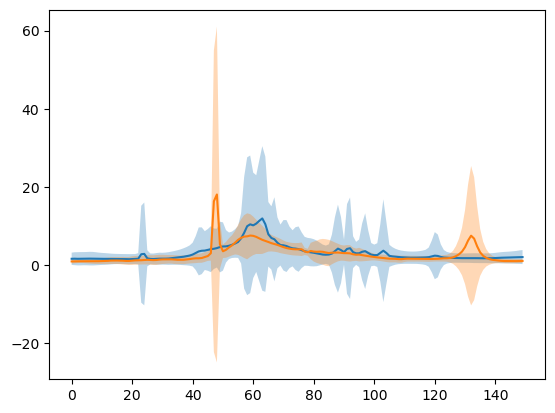

In [21]:
plt.figure()
absangvel = np.abs(j53_angular_velocities)
mean = np.nanmean(absangvel, axis=0)
std = np.nanstd(absangvel, axis=0)
plt.plot(mean)
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, alpha=0.3)

absangvel = np.abs(empty_angular_velocities)
mean = np.nanmean(absangvel, axis=0)
std = np.nanstd(absangvel, axis=0)
plt.plot(mean)
plt.fill_between(np.arange(len(mean)), mean - std, mean + std, alpha=0.3)
plt.show()